In [ ]:
import pandas as pd
import numpy as np

# Load the dataset into the tool.

In [ ]:
df=pd.read_csv("/content/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Univariate Analysis

In [ ]:
import seaborn as sns

<ipython-input-7-24e9b5890c61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

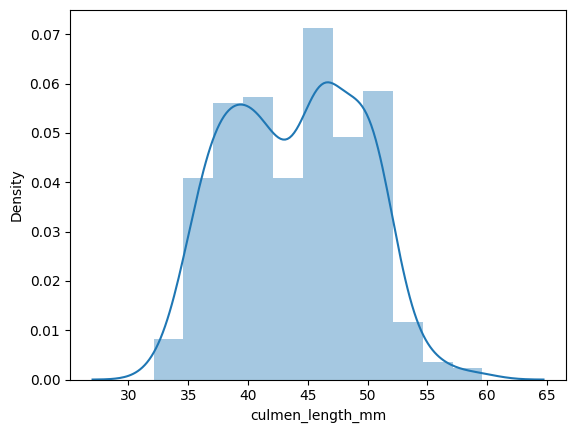

In [ ]:
sns.distplot(df.culmen_length_mm)

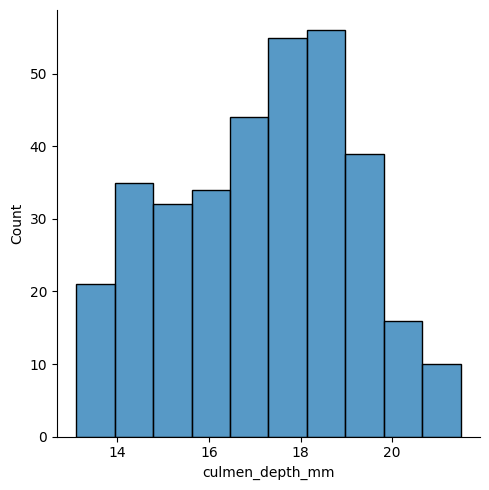

In [ ]:
sns.displot(df.culmen_depth_mm)

In [ ]:
import matplotlib.pyplot as plt

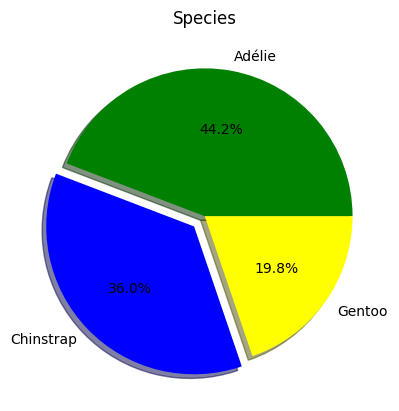

In [ ]:
plt.pie(df.species.value_counts(),[0,0.1,0],labels=["Adélie","Chinstrap","Gentoo"],autopct='%1.1f%%',shadow=True,colors=["green","blue","yellow"])
plt.title("Species")
plt.show()

<Axes: ylabel='island'>

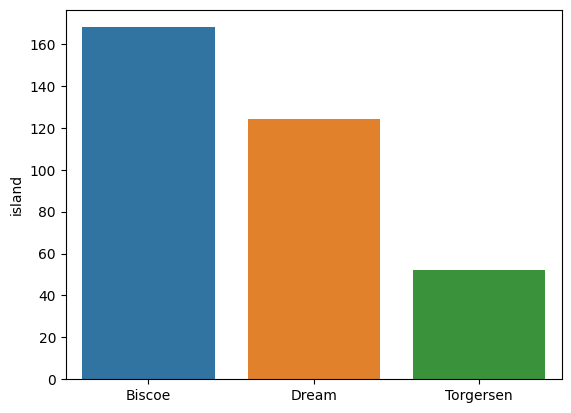

In [ ]:
sns.barplot(x=df.island.value_counts().index,y=df.island.value_counts())

# Bivariate Analysis

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

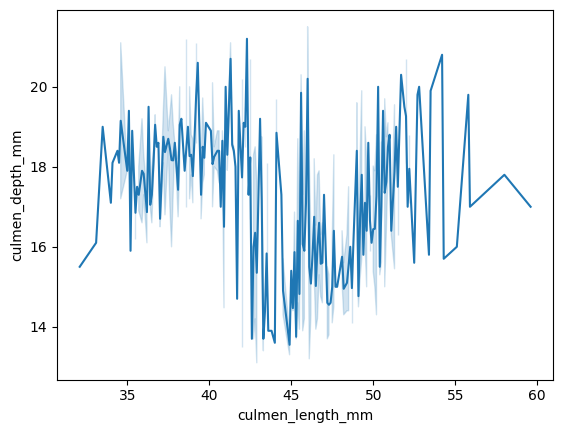

In [ ]:
sns.lineplot(x=df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

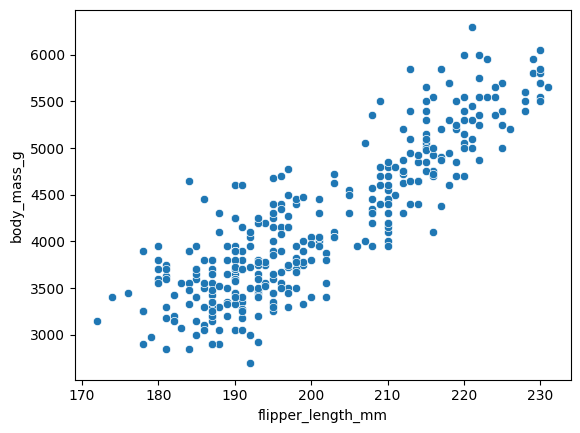

In [ ]:
sns.scatterplot(x=df.flipper_length_mm, y=df.body_mass_g)

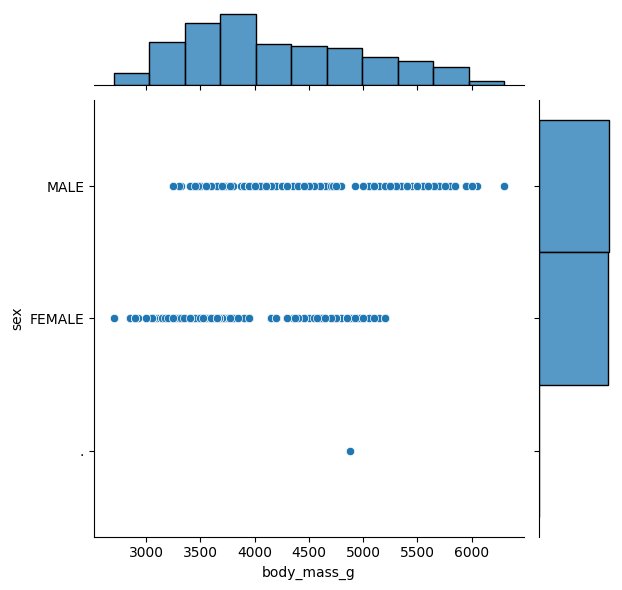

In [ ]:
sns.jointplot(x=df['body_mass_g'],y=df['sex'],data=df)

# Multivariate Analysis

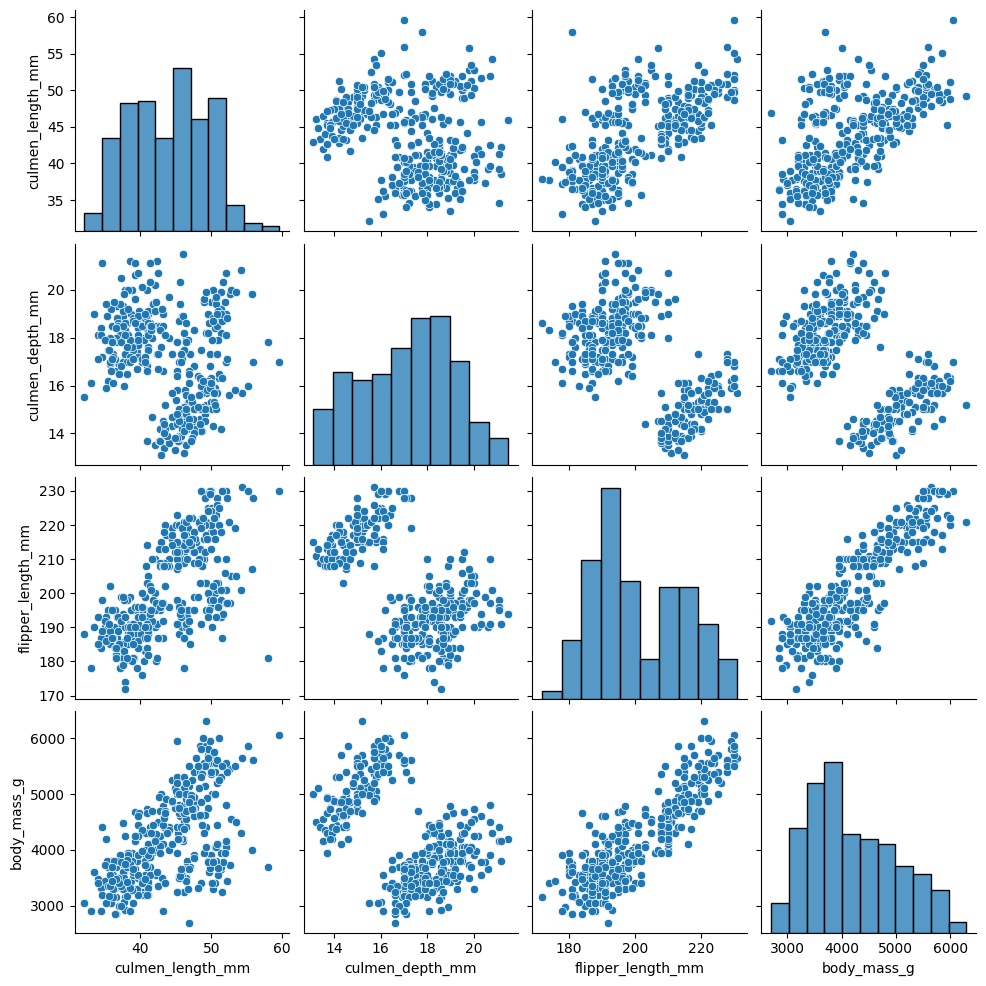

In [ ]:
sns.pairplot(df)

<ipython-input-16-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

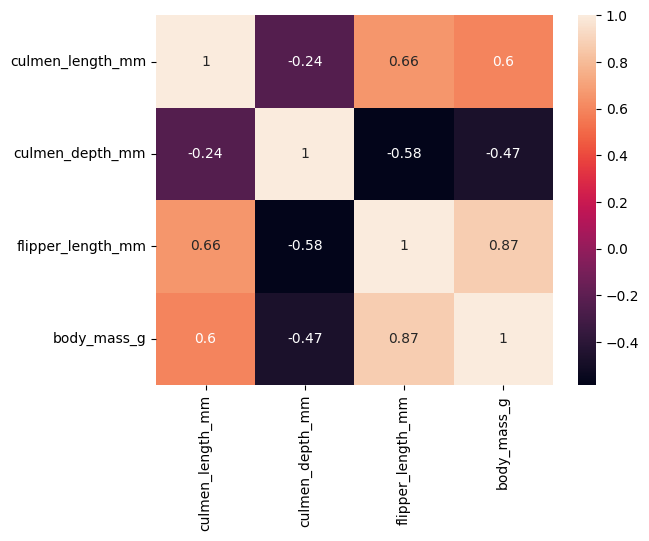

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Perform descriptive statistics on the dataset

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.shape

(344, 7)

# Check for Missing values and deal with them

In [ ]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# for numerical column - null values replacement
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace =True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace =True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace =True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace =True)

In [ ]:
# for categorical collumn - null values replacement
df['sex'].fillna(df['sex'].mode().iloc[0],inplace =True)

# Find the outliers and replace them outliers

<Axes: >

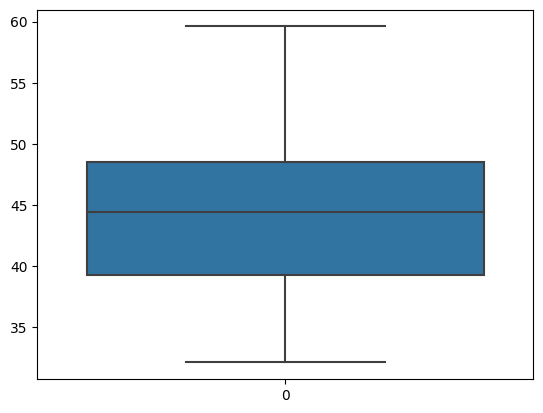

In [ ]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

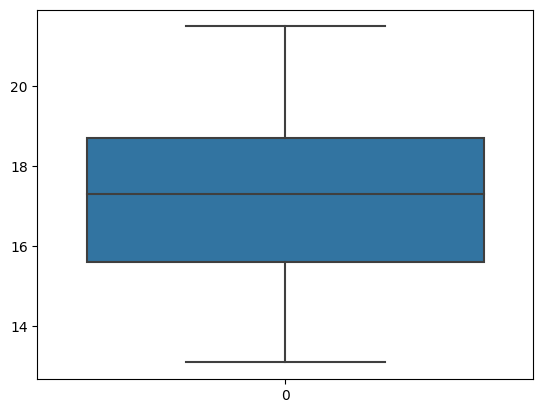

In [ ]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

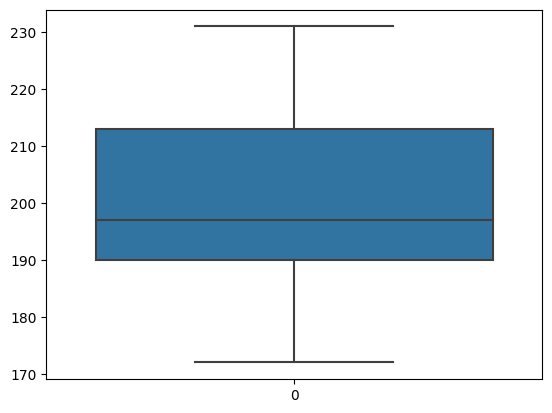

In [ ]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

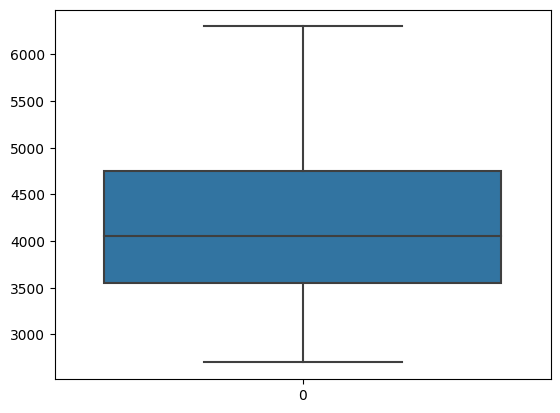

In [ ]:
sns.boxplot(df.body_mass_g)

In [ ]:
# NO OUTLIERS FOUND IN THE GIVEN DATASET.

# Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.sex = le.fit_transform(df.sex)
df.species = le.fit_transform(df.species)
df.island = le.fit_transform(df.island)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


# Check the correlation of independent variables with the target

In [ ]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

# Split the data into dependent and independent variables.

In [ ]:
#independent
X = df.drop(columns=['species'],axis = 1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,1
2,2,40.30,18.0,195.0,3250.0,1
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,1


In [ ]:
#Dependent
Y = df.species
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

# Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [ ]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


# Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=10)

# Check the training and testing data shape.

In [ ]:
x_train.shape

(275, 6)

In [ ]:
x_test.shape

(69, 6)

In [ ]:
y_train.shape

(275,)

In [ ]:
y_test.shape

(69,)